In [10]:
pip install opencv-python dlib face_recognition


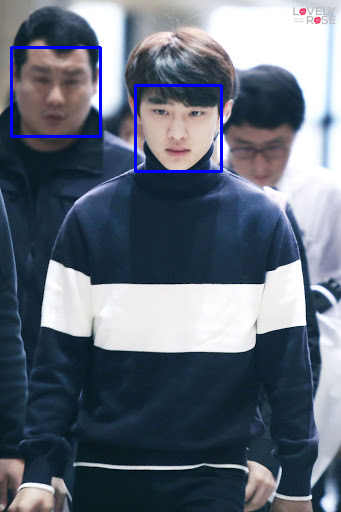

In [11]:
import cv2
from google.colab.patches import cv2_imshow

# Load pre-trained Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default (1).xml')

# Function to detect faces in an image
def detect_faces_haar(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the output
    cv2_imshow(img)

# Example usage
detect_faces_haar('/content/dominic.jpg')


In [12]:
!apt install -y python3-opencv
!pip install face_recognition


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-opencv is already the newest version (4.5.4+dfsg-9ubuntu4).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


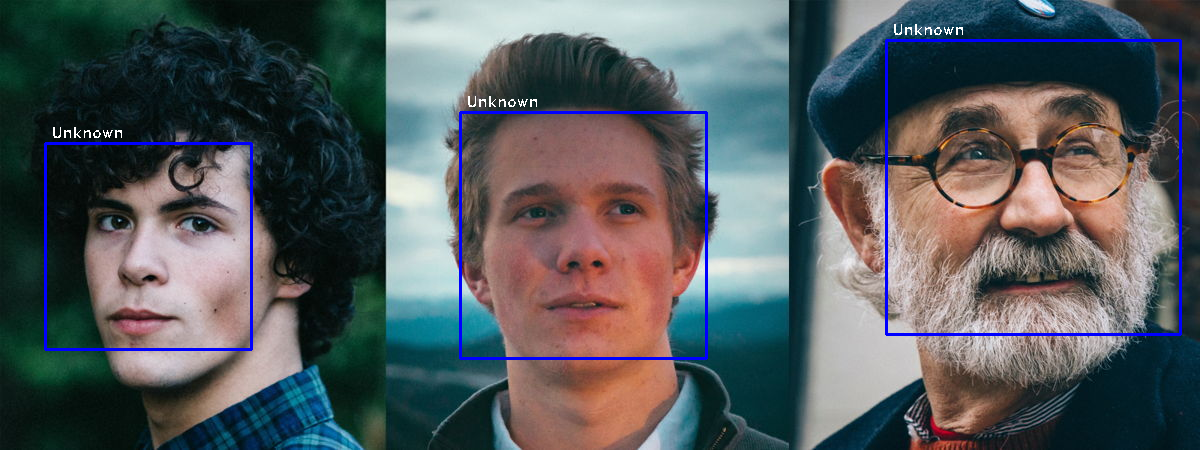

In [13]:
import cv2
from google.colab.patches import cv2_imshow

# Load pre-trained Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default (1).xml')

# Function to detect and recognize faces in an image
def detect_and_recognize_faces(image_path, known_names):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image using Haar cascades
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Recognize and draw rectangles around the faces
    for (x, y, w, h) in faces:
        # Extract the face region from the image
        face = gray[y:y+h, x:x+w]

        # Recognize the face based on known names
        name = "Unknown"
        for known_name, known_face_location in known_names.items():
            if x > known_face_location[0] and y > known_face_location[1] and x + w < known_face_location[2] and y + h < known_face_location[3]:
                name = known_name
                break

        # Draw rectangles and labels around the recognized faces
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(img, name, (x + 6, y - 6), font, 0.5, (255, 255, 255), 1)

    # Display the output
    cv2_imshow(img)

# Example usage
# Known face locations (x, y, x+w, y+h) mapped to respective names
known_names = {
    "Person1": (100, 100, 200, 200),
    "Person2": (300, 150, 400, 250)
}

detect_and_recognize_faces('/content/darker.jpg', known_names)
